In [47]:
import matplotlib.pyplot as plt
from Objects.Simulation import Simulation
import numpy as np
import pandas as pd
from copy import deepcopy
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [101]:
from matplotlib import lines, markers
from cycler import cycler

# Create cycler object. Use any styling from above you please
monochromeWithMarker = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '-.']) * cycler('marker', [ '.' ,'^']))
monochromeNoMarker = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '-.']) * cycler('marker', [',']))
monochrome = monochromeNoMarker.concat(monochromeWithMarker)

plt.set_cmap('gray')
# Overriding styles for current script
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['figure.figsize'] = (12,5)
mpl.rcParams['figure.dpi']= 300
plt.rcParams['axes.prop_cycle'] = monochrome

<Figure size 432x288 with 0 Axes>

In [3]:
def cal_one_p(p):
    return np.mean(p.delays), np.max(p.delays)

def cal_vdr(ps, tg):
    if type(ps) is not list:
        ps = [ps]
    total_vehPass = 0
    total_tg = 0
    for p in ps:
        total_vehPass += p.vehPass
        total_tg += tg
    return total_vehPass / total_tg * 3600

def get_data_array(p,tg):
    delaymean, delaymax = cal_one_p(p)
    return [delaymean, delaymax, cal_vdr(p, tg)]

In [140]:
simulation_time = 60 # seconds
n = 60 # number of vehicles
intended_speed = 80 * 1000/3600 # intended speed / speed limit of the road
sim = Simulation(time = simulation_time, avStep = 100)


LRT = [1.34, -1.34]
HSR = [0.58, -0.54]

human_profile = [1.7, -2.0]
av_profile = HSR

paras={
    'v_intend': intended_speed,
    'human_max_acc': human_profile[0],
    'human_max_dec': human_profile[1],
    'max_acc': av_profile[0],
    'max_dec': av_profile[1],
    'tsys': 1.0,
    'human_T': 1.8,
    'AV_T': 1.6
}

human = sim.run_human_simulation(n, paras)
human = get_data_array(human, simulation_time)

av = sim.run_av_simulation(n,paras)
av = get_data_array(av, simulation_time)

cav = sim.run_cav_simulation(n,paras)
cav = get_data_array(cav, simulation_time)

In [142]:
human

[0.09277343332193655, 0.23363514456212436, 1800.0]

In [20]:
firstVeh_sce = sim.run_first_vehicle_simulation(n,paras, firstVeh=1)
av_lrt = get_data_array(firstVeh_sce, simulation_time)

firstVeh_sce = sim.run_first_vehicle_simulation(n,paras, firstVeh=2)
cav_lrt = get_data_array(firstVeh_sce, simulation_time)

av_profile = HSR

paras={
    'v_intend': intended_speed,
    'human_max_acc': human_profile[0],
    'human_max_dec': human_profile[1],
    'max_acc': av_profile[0],
    'max_dec': av_profile[1],
    'tsys': 1.0,
    'human_T': 1.8,
    'AV_T': 1.6
}

firstVeh_sce = sim.run_first_vehicle_simulation(n,paras, firstVeh=1)
av_hsr = get_data_array(firstVeh_sce, simulation_time)

firstVeh_sce = sim.run_first_vehicle_simulation(n,paras, firstVeh=2)
cav_hsr = get_data_array(firstVeh_sce, simulation_time)

In [21]:
human, av_lrt,av_hsr,cav_lrt, cav_hsr,

([0.09277343332193655, 0.23363514456212436, 1800.0],
 [0.09756322961859022, 0.24059666303243463, 1800.0],
 [0.12305344941103667, 0.2617925244983868, 1680.0],
 [0.09706167924504329, 0.24043016373755957, 1800.0],
 [0.12162833339193768, 0.26165726347058843, 1680.0])

In [48]:
# mix human with AV
av_profile = LRT

paras={
    'v_intend': intended_speed,
    'human_max_acc': human_profile[0],
    'human_max_dec': human_profile[1],
    'max_acc': av_profile[0],
    'max_dec': av_profile[1],
    'tsys': 1.0,
    'human_T': 1.8,
    'AV_T': 1.6
}
human_av_lrt = {}
human_cav_lrt = {}
for i in range(6):
    av_ratio = i * 0.2
    human_ratio = 1-av_ratio
    human_av_lrt[i] = []
    human_cav_lrt[i] = []
    print(human_ratio)
    for j in range(20):
        mixed = sim.run_mixed_simulation(n,paras,[human_ratio,av_ratio])
        result=deepcopy(get_data_array(mixed, simulation_time))
        human_av_lrt[i].append(result)
    for j in range(20):
        mixed = sim.run_mixed_simulation(n,paras,[human_ratio,0])
        result=deepcopy(get_data_array(mixed, simulation_time))
        human_cav_lrt[i].append(result)

1.0
0.8
0.6
0.3999999999999999
0.19999999999999996
0.0


In [28]:
# mix human with AV
av_profile = HSR

paras={
    'v_intend': intended_speed,
    'human_max_acc': human_profile[0],
    'human_max_dec': human_profile[1],
    'max_acc': av_profile[0],
    'max_dec': av_profile[1],
    'tsys': 1.0,
    'human_T': 1.8,
    'AV_T': 1.6
}
human_av_hsr = {}
human_cav_hsr = {}
for i in range(6):
    av_ratio = i * 0.2
    human_ratio = 1-av_ratio
    human_av_hsr[i] = []
    human_cav_hsr[i] = []
    print(human_ratio)
    for j in range(20):
        mixed = sim.run_mixed_simulation(n,paras,[human_ratio,av_ratio])
        result=get_data_array(mixed, simulation_time).copy()
        human_av_hsr[i].append(result)
    for j in range(20):
        mixed = sim.run_mixed_simulation(n,paras,[human_ratio,0])
        result=get_data_array(mixed, simulation_time).copy()
        human_cav_hsr[i].append(result)

1.0
0.8
0.6
0.3999999999999999
0.19999999999999996
0.0


In [95]:
human_cav_hsr == human_av_hsr

False

In [67]:
human_av_lrt[1], human_cav_lrt[1]

([[0.09364677593604066, 0.23040875651418743, 1860.0000000000002],
  [0.09569116889176145, 0.23788934961732913, 1860.0000000000002],
  [0.0947807513467192, 0.23873281643255928, 1860.0000000000002],
  [0.09312400826878871, 0.2319897571191478, 1860.0000000000002],
  [0.09221637104453102, 0.2296856134658243, 1800.0],
  [0.0932513267479561, 0.23615457334720702, 1860.0000000000002],
  [0.0928109245610051, 0.23020074593577156, 1860.0000000000002],
  [0.09370250452893496, 0.23451899469066734, 1860.0000000000002],
  [0.09168877878837088, 0.22978362230233862, 1800.0],
  [0.0984999486188175, 0.23883011106293506, 1860.0000000000002],
  [0.09348517730909119, 0.2365817232742274, 1860.0000000000002],
  [0.09426626945315915, 0.23431234017351454, 1860.0000000000002],
  [0.09421779827670676, 0.23596895647534233, 1860.0000000000002],
  [0.0916778663493365, 0.2295774132916282, 1860.0000000000002],
  [0.09154182710033323, 0.23100845689840482, 1860.0000000000002],
  [0.09218207273227931, 0.22963209334106843

In [90]:

def get_result(input_dict):
    result_array = {}
    for key,value in input_dict.items():
        result_array[key] = deepcopy([np.mean([x[0] for x in value]), np.mean([x[1] for x in value]), np.mean([x[2] for x in value])])
    return result_array


In [91]:

av_lrt = get_result(human_av_lrt)
av_hsr = get_result(human_av_hsr)
cav_lrt = get_result(human_cav_lrt)
cav_hsr = get_result(human_cav_hsr)

In [137]:
cav_hsr

{0: [0.09277343332193655, 0.2336351445621244, 1800.0],
 1: [0.12758305512511642, 0.2714761459366872, 1620.0],
 2: [0.1376505956812147, 0.2765117646425418, 1605.0],
 3: [0.12872148361844976, 0.26389683320048396, 1671.0],
 4: [0.11397918501707245, 0.22755912057448663, 1887.0],
 5: [0.0718390225570538, 0.14478860671369317, 2760.0]}

[0.07183902255705381, 0.14478860671369317, 2760.0]

Text(0,0.5,'VDR (veh/h)')

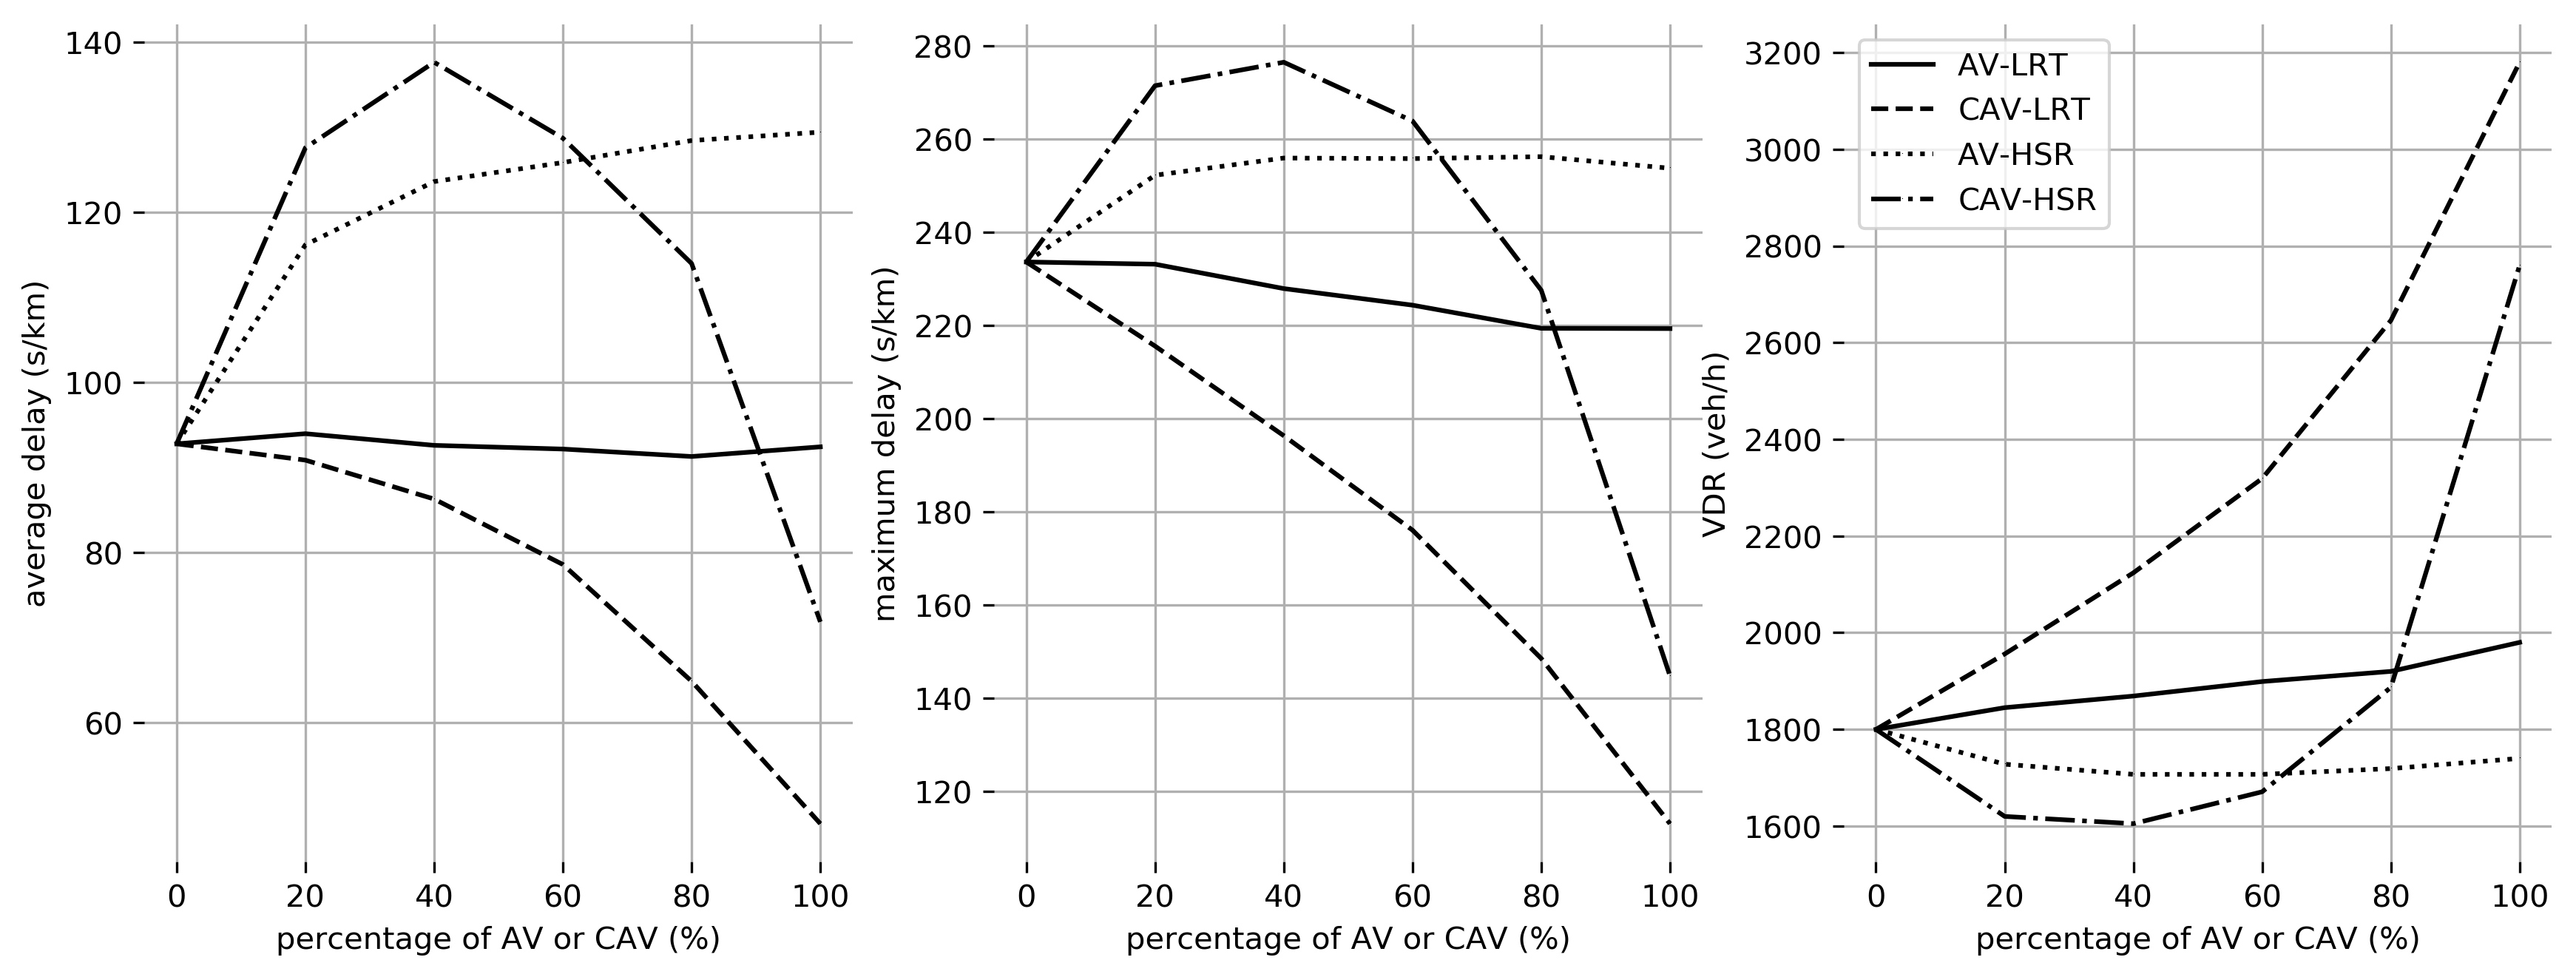

In [145]:
def map_to_dim(mydict, dim):
    res = np.array([mydict[x][dim] for x in sorted(mydict.keys())])
    if dim < 2:
        res *= 1000
    return res

human_avg_delay, human_max_delay, human_vdr = human[0] * 1000, human[1] * 1000,human[2]

x = [x*20 for x in range(6)]
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
plt.xlabel("percentage of AV or CAV (%)")
plt.ylabel("average delay (s/km)")
dim = 0
plt.plot(x, map_to_dim(av_lrt,dim), label = "AV-LRT")
plt.plot(x, map_to_dim(cav_lrt,dim), label = "CAV-LRT")
plt.plot(x, map_to_dim(av_hsr,dim), label = "AV-HSR")
plt.plot(x, map_to_dim(cav_hsr,dim), label = "CAV-HSR")
plt.subplot(1,3,2)
plt.xlabel("percentage of AV or CAV (%)")
plt.ylabel("maximum delay (s/km)")
dim =1
plt.plot(x, map_to_dim(av_lrt,dim), label = "AV-LRT")
plt.plot(x, map_to_dim(cav_lrt,dim), label = "CAV-LRT")
plt.plot(x, map_to_dim(av_hsr,dim), label = "AV-HSR")
plt.plot(x, map_to_dim(cav_hsr,dim), label = "CAV-HSR")
dim =2
plt.subplot(1,3,3)
plt.plot(x, map_to_dim(av_lrt,dim), label = "AV-LRT")
plt.plot(x, map_to_dim(cav_lrt,dim), label = "CAV-LRT")
plt.plot(x, map_to_dim(av_hsr,dim), label = "AV-HSR")
plt.plot(x, map_to_dim(cav_hsr,dim), label = "CAV-HSR")
plt.legend(title='')
plt.xlabel("percentage of AV or CAV (%)")
plt.ylabel("VDR (veh/h)")

Text(0,0.5,'VDR (veh/h)')

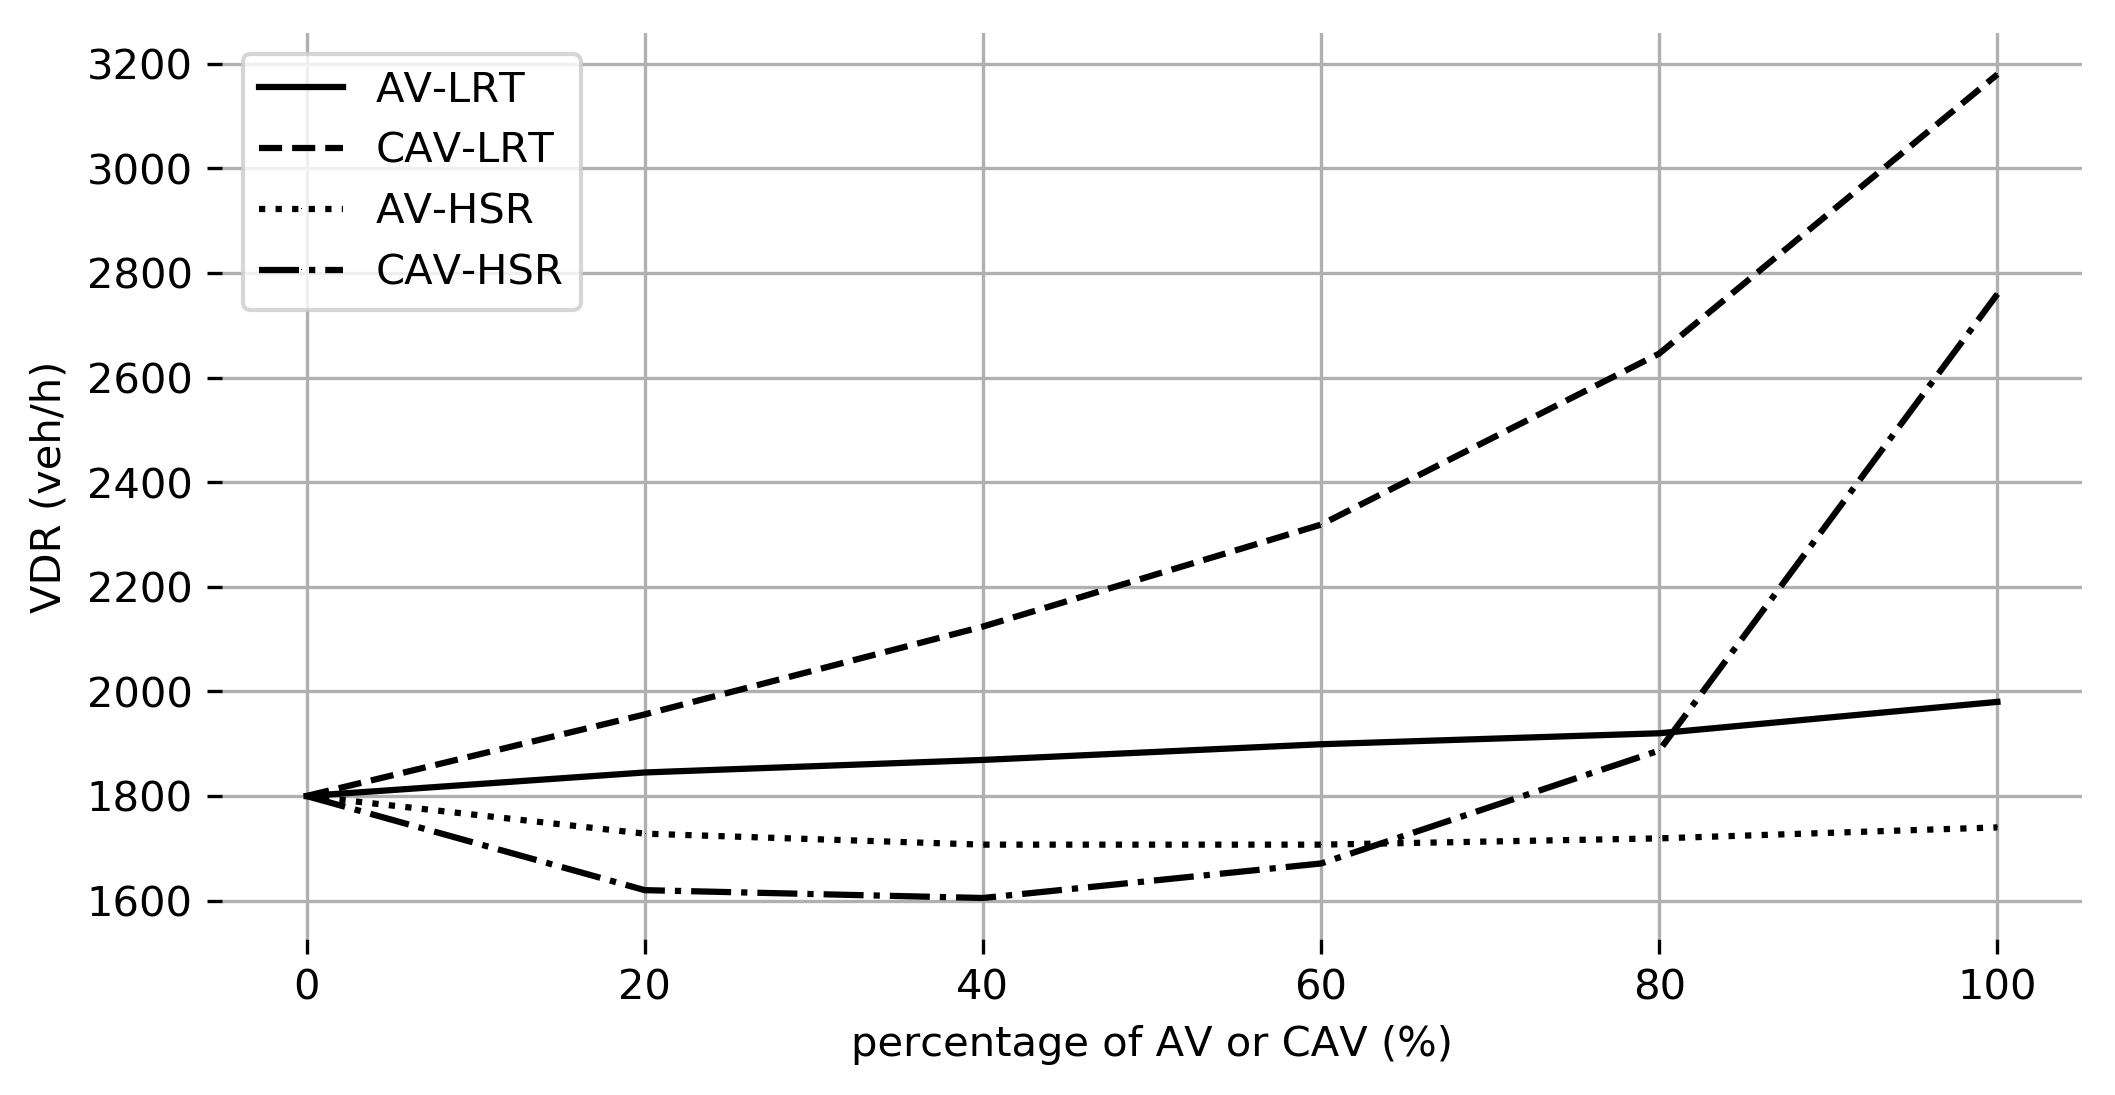

In [124]:
plt.figure(figsize=(8,4))
dim =2
plt.plot(x, map_to_dim(av_lrt,dim), label = "AV-LRT")
plt.plot(x, map_to_dim(cav_lrt,dim), label = "CAV-LRT")
plt.plot(x, map_to_dim(av_hsr,dim), label = "AV-HSR")
plt.plot(x, map_to_dim(cav_hsr,dim), label = "CAV-HSR")
plt.legend(title='')
plt.xlabel("percentage of AV or CAV (%)")
plt.ylabel("VDR (veh/h)")